### Первичная обработка данных

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('import-export-values_1950-2024_1991-2024_1991-2024.csv', skiprows=9)
#Дескриптивная часть
def data_describtion (data):
    print(f'Размер таблицы: {data.shape} (кол-во колонок, строк)')
    print(f'Типы данных: {data.dtypes}')
    print('\n\nТри случайные строки')
    print(data.sample(3))

data_describtion(df)

Размер таблицы: (118, 39) (кол-во колонок, строк)
Типы данных: Exports by              object
1991                   float64
1992                   float64
1993                   float64
1994                   float64
1995                   float64
1996                   float64
1997                   float64
1998                   float64
1999                   float64
2000                   float64
2001                   float64
2002                   float64
2003                   float64
2004                   float64
2005                   float64
2006                   float64
2007                   float64
2008                   float64
2009                   float64
2010                   float64
2011                   float64
2012                   float64
2013                   float64
2014                   float64
2015                   float64
2016                   float64
2017                   float64
2018                   float64
2019                   float64
2020   

____
0-0.5 значений тренда SIPRI закодированы как 0, а когда реально 0, то NaN. Поэтому округляю все 0-0.5 до 0.5, а все NaN (в реальности 0), в 0
____

In [5]:
df = df.replace(0, 0.5).fillna(0).drop(117)
df

,Exports by,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2019,2020,2021,2022,2023,2024,1991-2024,Percentage,Sum total years,Percentage of total
0,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0%,1.0,0.0%
1,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0%,0.5,0.0%
2,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0%,2.0,0.0%
3,Argentina,0.5,0.0,13.0,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0%,31.0,0.0%
4,Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0%,4.0,0.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0%,51.0,0.0%
113,Viet Nam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0%,24.0,0.0%
114,Yugoslavia,480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,480.0,0.1%,480.0,0.1%
115,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0%,4.0,0.0%


### Задание 1
Анализ лидеров по продаже оружия. Сравнить динамику топ-3 топ-5 экспортеров, посчитать рыночную долю топ 5 экспортеров

In [7]:
#Топ 3 экспортера. В задании не указано за какой год, поэтому смотрю за все время (с 1991г)
top3 = df.nlargest(3, 'Sum total years').reset_index(drop=True).rename(columns={'Exports by': 'country'})
top3 = top3.drop(['Percentage', 'Sum total years', 'Percentage of total', '1991-2024'], axis=1)
top3

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,United States,12483.0,14087.0,13766.0,11492.0,11219.0,10834.0,14513.0,15813.0,11529.0,...,9743.0,9426.0,11409.0,9255.0,10534.0,10024.0,10960.0,15351.0,11102.0,13512.0
1,Russia,0.0,2643.0,3489.0,1540.0,3859.0,3624.0,3451.0,2122.0,4392.0,...,5751.0,6676.0,6356.0,6871.0,5100.0,3523.0,2402.0,2510.0,1329.0,1339.0
2,France,1158.0,1241.0,967.0,852.0,965.0,1837.0,3172.0,3085.0,1680.0,...,2252.0,2185.0,2319.0,1897.0,3738.0,2384.0,3836.0,3123.0,2150.0,2272.0


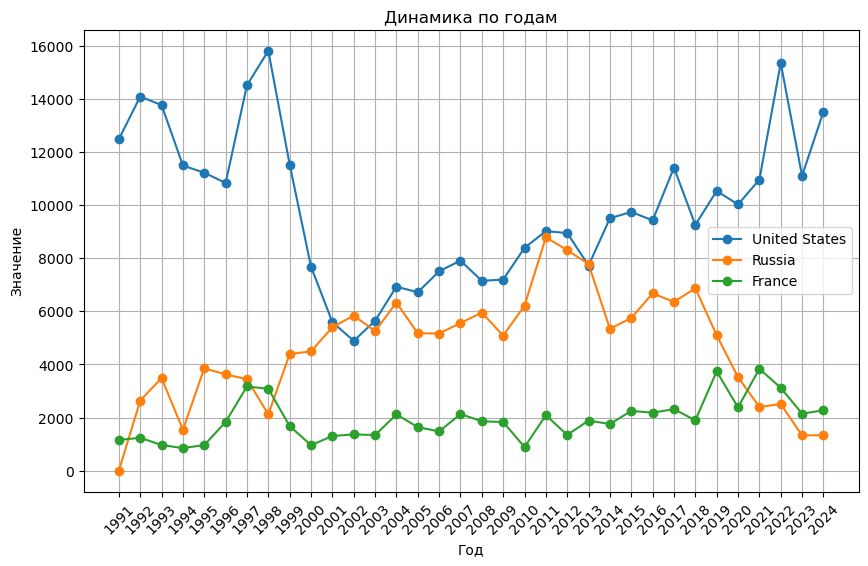

In [8]:
#Динамика топ 3 экспортеров
plt.figure(figsize=(10, 6))

for i in range(len(top3)):
    #данные для графика
    name = top3.iloc[i, 0]
    year = top3.iloc[i, 1:] 
    #линии по странам
    plt.plot(year.index, year.values, 
             marker='o', 
             label=name)

plt.title('Динамика по годам')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()

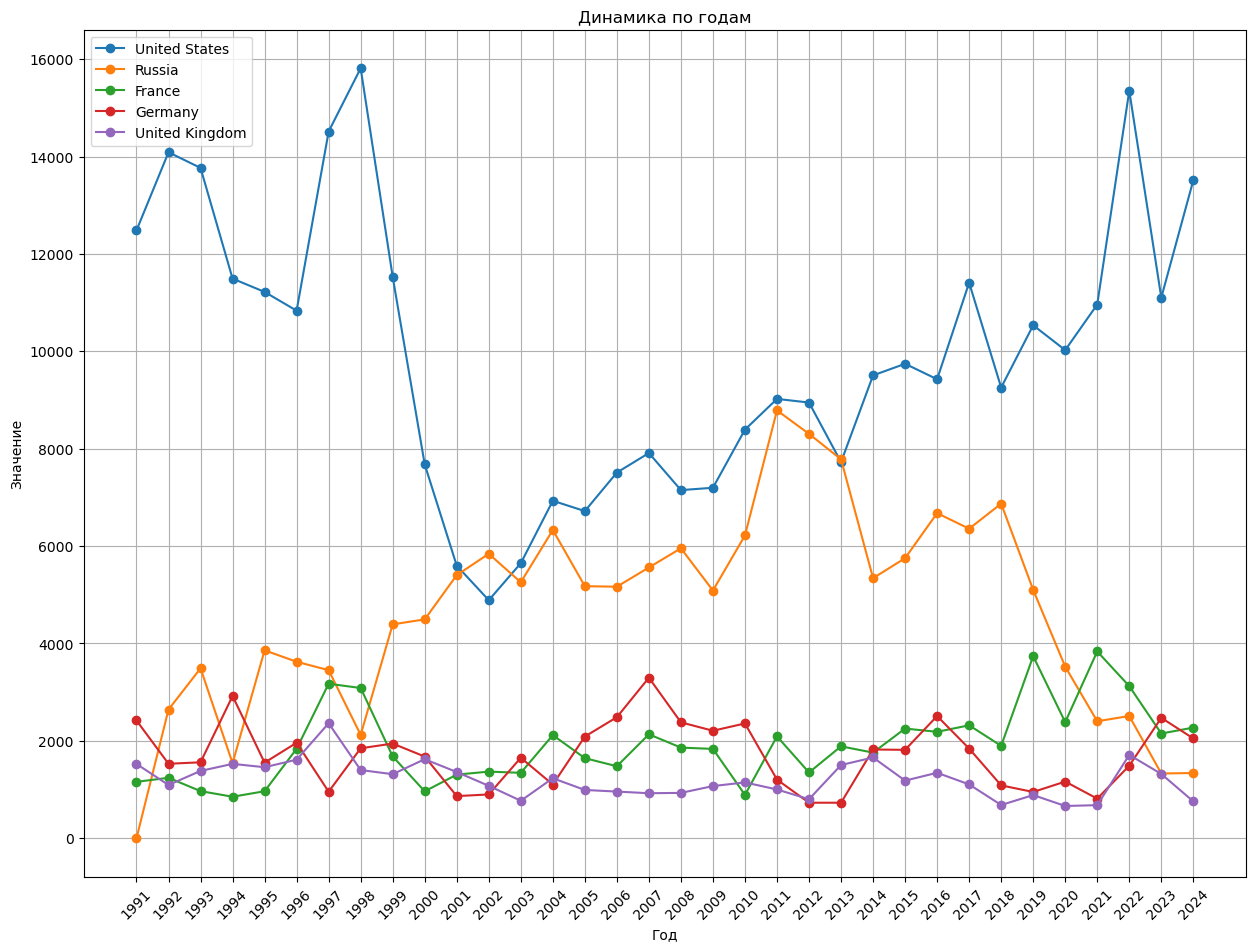

In [9]:
#Топ 5 экспортеров
top5 = df.nlargest(5, 'Sum total years').reset_index(drop=True).rename(columns={'Exports by': 'country'})
top5 = top5.drop(['Percentage', 'Sum total years', 'Percentage of total', '1991-2024'], axis=1)

#Динамика топ 5 экспортеров
plt.figure(figsize=(15, 11))

for i in range(len(top5)):
    #данные для графика
    name = top5.iloc[i, 0]
    year = top5.iloc[i, 1:] 
    #линии по странам
    plt.plot(year.index, year.values, 
             marker='o', 
             label=name)

plt.title('Динамика по годам')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()

In [10]:
#Рыночная доля топ 5 экспортеров. Посмотрю по последнему году (2024), иначе нечитаемый результат
df_mrkshare = df[['Exports by', '2024']].nlargest(5, '2024')
df_mrkshare['market_share'] = (df_mrkshare['2024'] / df_mrkshare['2024'].sum() * 100).round(2)
df_mrkshare[['Exports by', 'market_share']].sort_values('market_share', ascending=False)

,Exports by,market_share
109,United States,65.75
37,France,11.06
39,Germany,9.97
50,Italy,6.71
86,Russia,6.52


### Задание 2 
Сравнение клиентуры. Взять США и РФ, взять топ 5 покупателей оружия за все время наблюдения в БД, если есть пересечения (между покупателями) — найти и обосновать почему они есть или почему их нет

In [12]:
#Для этого задания нужны другие таблицы, загружаю их
rus = pd.read_csv('Russian_export.csv', skiprows=11)
usa = pd.read_csv('USA_export.csv', skiprows=11, encoding='cp1251') #почему то utf-8 не работал

print('Описание таблицы Russian_export\n', '====' * 40)
data_describtion(rus)
print('Описание таблицы USA_export\n', '====' * 40)
data_describtion(usa)


Описание таблицы Russian_export
Размер таблицы: (1246, 16) (кол-во колонок, строк)
Типы данных: Recipient                          object
Supplier                           object
Year of order                       int64
                                   object
Number ordered                    float64
 .1                                object
Weapon designation                 object
Weapon description                 object
Number delivered                    int64
 .2                                object
Year(s) of delivery                object
status                             object
Comments                           object
SIPRI TIV per unit                float64
SIPRI TIV for total order         float64
SIPRI TIV of delivered weapons    float64
dtype: object


Три случайные строки
      Recipient Supplier  Year of order       Number ordered   .1  \
67      Algeria   Russia           2006    ?           500.0    ?   
682  Kazakhstan   Russia           2010    ?            2

In [13]:
#Топ 5 покупателей России
#Сначала обработаю данные: оставлю только название страны, сколько она получила оружия в SIPRI-единицах и кто поставил (нужно будет для бар плота)
rus = rus[['Recipient', 'SIPRI TIV of delivered weapons']]
rus = rus.groupby('Recipient').agg(
    total_weapons_import = ('SIPRI TIV of delivered weapons', 'sum')).nlargest(5, 'total_weapons_import').sort_values('total_weapons_import', ascending=False)
rus

,total_weapons_import
Recipient,
India,44443.46
China,38156.15
Algeria,12980.92
Viet Nam,7571.50
Egypt,5132.05


In [14]:
#Топ 5 покупателей США
usa = usa[['Recipient', 'SIPRI TIV of delivered weapons']]
usa = usa.groupby('Recipient').agg(
    total_weapons_import = ('SIPRI TIV of delivered weapons', 'sum')).nlargest(5, 'total_weapons_import').sort_values('total_weapons_import', ascending=False)
usa

,total_weapons_import
Recipient,
Saudi Arabia,35212.35
Japan,28610.39
South Korea,27171.16
Taiwan,19171.14
Turkiye,16849.95


_____
**Обоснование**. Такое распределение покупателей связано с:
1. Покупатели США – члены НАТО или являются стратегическими союзниками США. Покупатели России - страны с многовекторной политикой и у которых ранее были налажы связи с СССР
2. Американское оружие совместимо со стандартами НАТО, а Российское со стандартами СССР. Если страны еще в Холодную войну начали закупать у кого-то одного, то они это продолжают и сейчас, чтобы не нарушать собственные стандарты и не вызывать путаницу
3. Поставки оружия - способ укрепления отношений в разных форматах сотрудничества. У США это АНЗЮС и НАТО, у России - БРИКС и страны-противники Запада

### Задание 3
Бар чарт (по покупателям вроде бы)

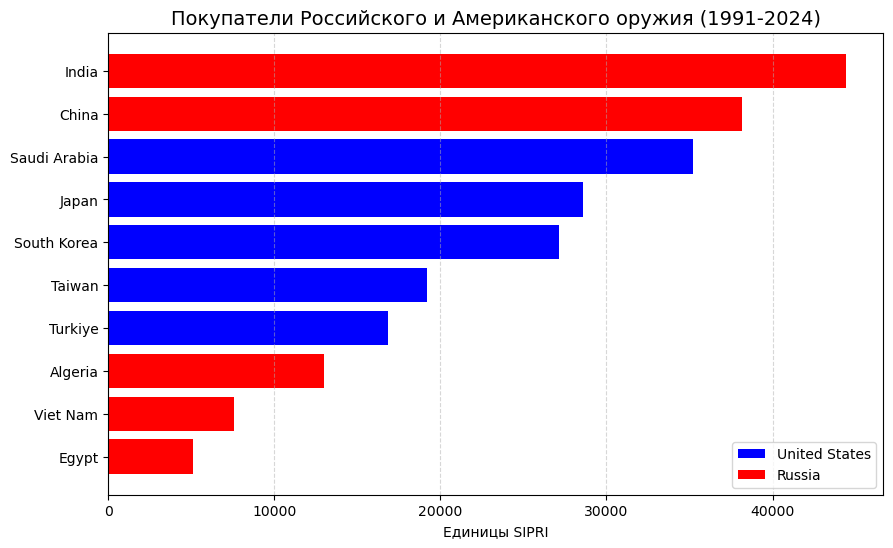

In [17]:
#вернем обозначение поставщика в таблицы
rus['Supplier'] = 'Russia'
usa['Supplier'] = 'United States'

bar_df = pd.concat([rus,usa]).reset_index().sort_values('total_weapons_import', ascending=True)

#рисуем график
plt.figure(figsize=(10, 6))

#цвета в зависимости от поставщика
colors = bar_df['Supplier'].map({'United States': 'blue', 'Russia': 'red'})

plt.barh(bar_df['Recipient'], bar_df['total_weapons_import'], color=colors)

#добавляем легенду вручную (т.к. barh не делает это автоматически для групп цветов)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', label='United States'),
                   Patch(facecolor='red', label='Russia')]
plt.legend(handles=legend_elements)

plt.title('Покупатели Российского и Американского оружия (1991-2024)', fontsize=14)
plt.xlabel('Единицы SIPRI')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

### Задание 4
Нормированная диаграмма (какую долю мирового рынка занимали топ 5 стран)

In [19]:
#1 - вычислить общий рынок по годам
world_market = df.iloc[:, 1:-4].sum() #выбираю все строки и только колонки по годам

#2 - сколько топ 5 продавали по годам все вместе
top5_together = top5.iloc[:, 1:].sum() #она до отфильтрована от лишнего

#3 - считаю долю рынка топ 5
top5_marketshare = (top5_together / world_market).round(2)

#4 - считаю процент НЕ топ 5
lohi_marketshare = ( (world_market-top5_together) / world_market).round(2)

#делаю из этой каши таблицу для удобства
task4 = pd.DataFrame({
    'year': top5_marketshare.index.astype(int),
    'top5_share': top5_marketshare.values,
    'lohi_share': lohi_marketshare.values,
    'world_total': world_market.values,
    'top5_total': top5_together.values
})
task4

,year,top5_share,lohi_share,world_total,top5_total
0,1991,0.63,0.37,28071.0,17584.0
1,1992,0.85,0.15,24238.0,20593.0
2,1993,0.82,0.18,25832.5,21163.0
3,1994,0.80,0.20,22980.5,18331.0
4,1995,0.83,0.17,22985.0,19053.0
5,1996,0.84,0.16,23788.0,19869.0
6,1997,0.85,0.15,28918.0,24452.0
7,1998,0.87,0.13,27890.0,24267.0
8,1999,0.83,0.17,24987.5,20860.0
9,2000,0.85,0.15,19365.0,16434.0


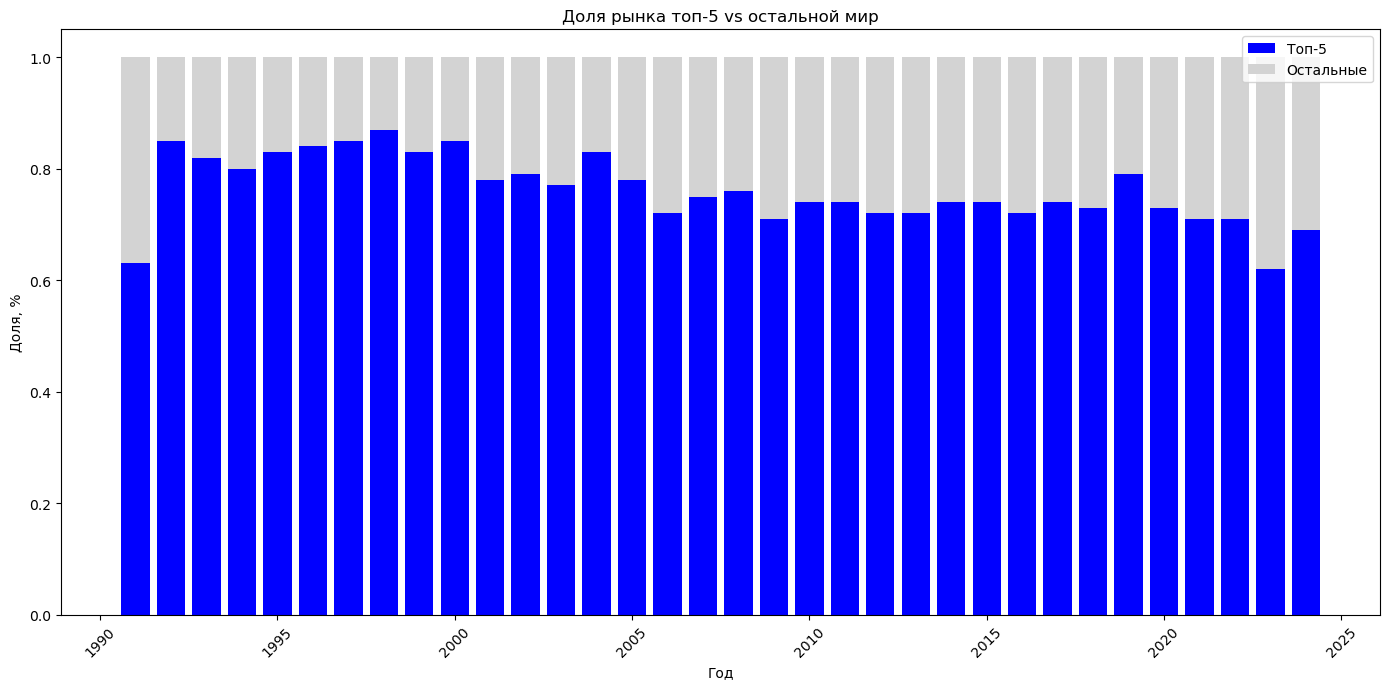

In [49]:
#рисую
#меня на паре не было, поэтому строю без опоры на какой-либо скрипт и может получиться немножко неполноценно

plt.figure(figsize=(14, 7))
plt.bar(task4['year'], task4['top5_share'], label='Топ-5', color='blue')
plt.bar(task4['year'], task4['lohi_share'], 
        bottom=task4['top5_share'], label='Остальные', color='lightgray')

# Настройки
plt.title('Доля рынка топ-5 vs остальной мир')
plt.xlabel('Год')
plt.ylabel('Доля, %')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Задание 5
График тренда экспорта участниц ядерного клуба

In [22]:
#создаю массив с названием стран участниц ядерного клуба
nuclear = ['Russia', 'United States', 'United Kingdom', 'France',
          'China', 'India', 'Pakistan', 'Israel', 'North Korea']

#теперь создаем отдельную таблицу
task5 = df.iloc[:, 0:-4].rename(columns={'Exports by': 'country'})
task5 = task5[task5['country'].isin(nuclear)]
task5

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
19,China,1321.0,670.0,1435.0,1063.0,981.0,764.0,427.0,347.0,332.0,...,1819.0,2449.0,1624.0,1365.0,1604.0,635.0,1358.0,2280.0,2982.0,1131.0
37,France,1158.0,1241.0,967.0,852.0,965.0,1837.0,3172.0,3085.0,1680.0,...,2252.0,2185.0,2319.0,1897.0,3738.0,2384.0,3836.0,3123.0,2150.0,2272.0
45,India,0.5,7.0,9.0,2.0,2.0,0.5,0.5,0.5,0.5,...,42.0,49.0,56.0,47.0,20.0,153.0,54.0,7.0,41.0,25.0
49,Israel,157.0,354.0,416.0,337.0,206.0,335.0,271.0,227.0,177.0,...,570.0,1236.0,1193.0,1147.0,392.0,380.0,711.0,1050.0,1281.0,1026.0
74,North Korea,85.0,98.0,104.0,21.0,33.0,35.0,35.0,59.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,243.0
78,Pakistan,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,3.0,1.0,0.0,53.0,1.0,5.0,6.0
86,Russia,0.0,2643.0,3489.0,1540.0,3859.0,3624.0,3451.0,2122.0,4392.0,...,5751.0,6676.0,6356.0,6871.0,5100.0,3523.0,2402.0,2510.0,1329.0,1339.0
108,United Kingdom,1525.0,1093.0,1382.0,1527.0,1458.0,1613.0,2361.0,1400.0,1315.0,...,1183.0,1344.0,1105.0,682.0,886.0,662.0,679.0,1711.0,1320.0,756.0
109,United States,12483.0,14087.0,13766.0,11492.0,11219.0,10834.0,14513.0,15813.0,11529.0,...,9743.0,9426.0,11409.0,9255.0,10534.0,10024.0,10960.0,15351.0,11102.0,13512.0


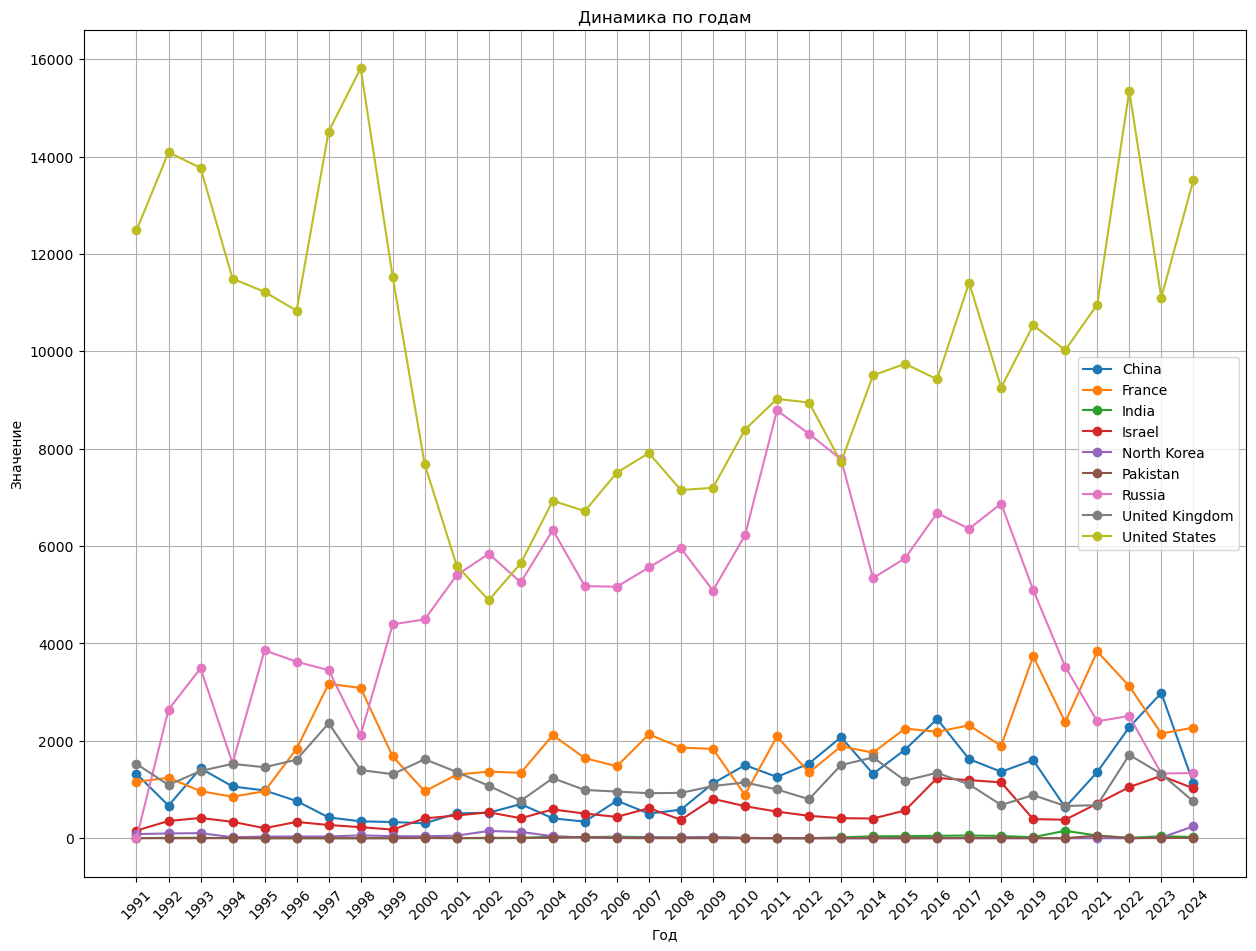

In [23]:
#рисую
plt.figure(figsize=(15, 11))

#как я понял смысл как и в задании номер 1, просто разные страны, поэтому код для графика идентичный
for i in range(len(task5)):
    #данные для графика
    name = task5.iloc[i, 0]
    year = task5.iloc[i, 1:] 
    #линии по странам
    plt.plot(year.index, year.values, 
             marker='o', 
             label=name)

plt.title('Динамика по годам')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()